In [39]:
import pandas as pd 
import nltk
from matplotlib import pyplot as plt 
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle as pk

read/import data

In [2]:

data = pd.read_csv("MRSA Dataset.csv")

analyse the dataset

In [3]:
data.head(7)

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
5,"As a young lass, beautiful Joan Woodbury (as R...",neg
6,"Low budget, but still creepy enough to hold yo...",neg


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [5]:
data['sentiment'].value_counts()

sentiment
neg    500
pos    500
Name: count, dtype: int64

drop dublicate value if available

In [6]:
data.dropna(inplace=True)

In [7]:
data.describe()

,text,sentiment
count,1000,1000
unique,999,2
top,Ed Wood rides again. The fact that this movie ...,neg
freq,2,500


peform preprocessing/clean up in the text (i.e check every word in the review and convert the capital letter to small case by making sure that lower case if not part of stop in english language)

In [8]:
def data_clean(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [9]:
data['text'] = data['text'].apply(data_clean)

draw wordcloud (print all the words in the documment/review in image)

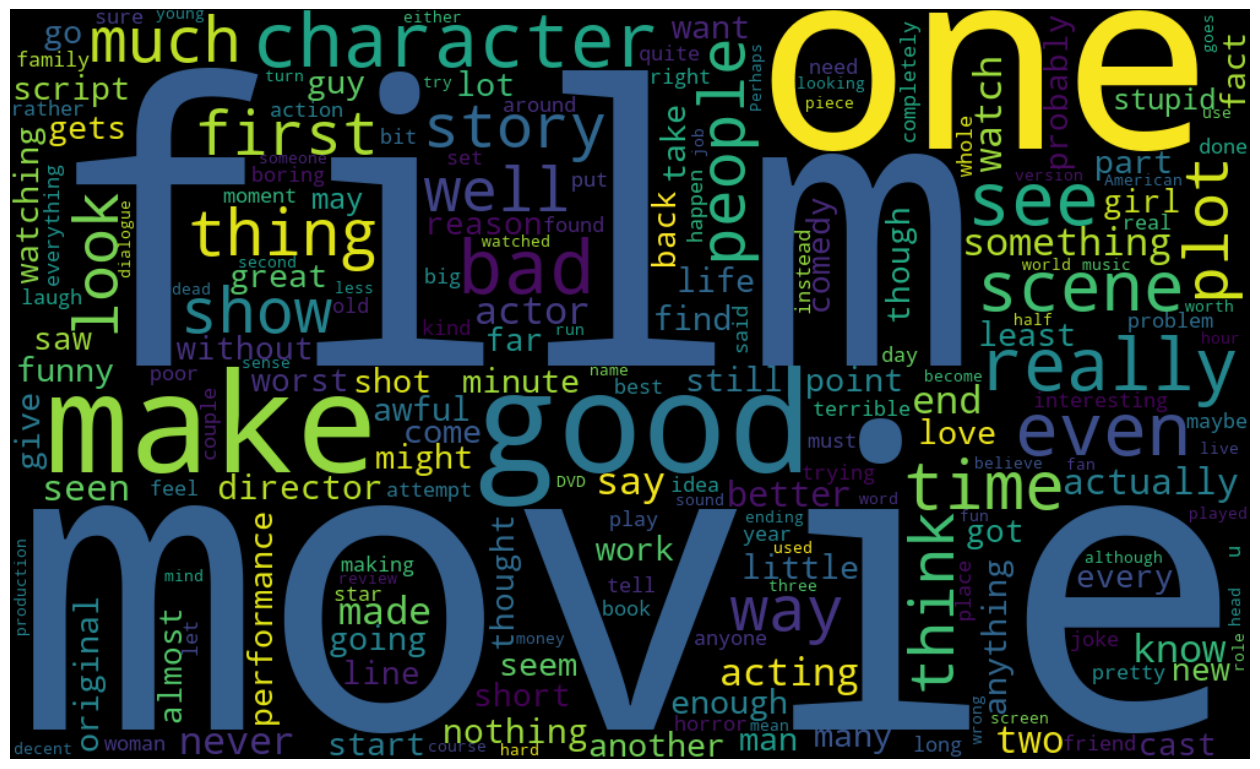

In [13]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 612,width =1012, max_font_size = 1002)
plt.figure(figsize = (16,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

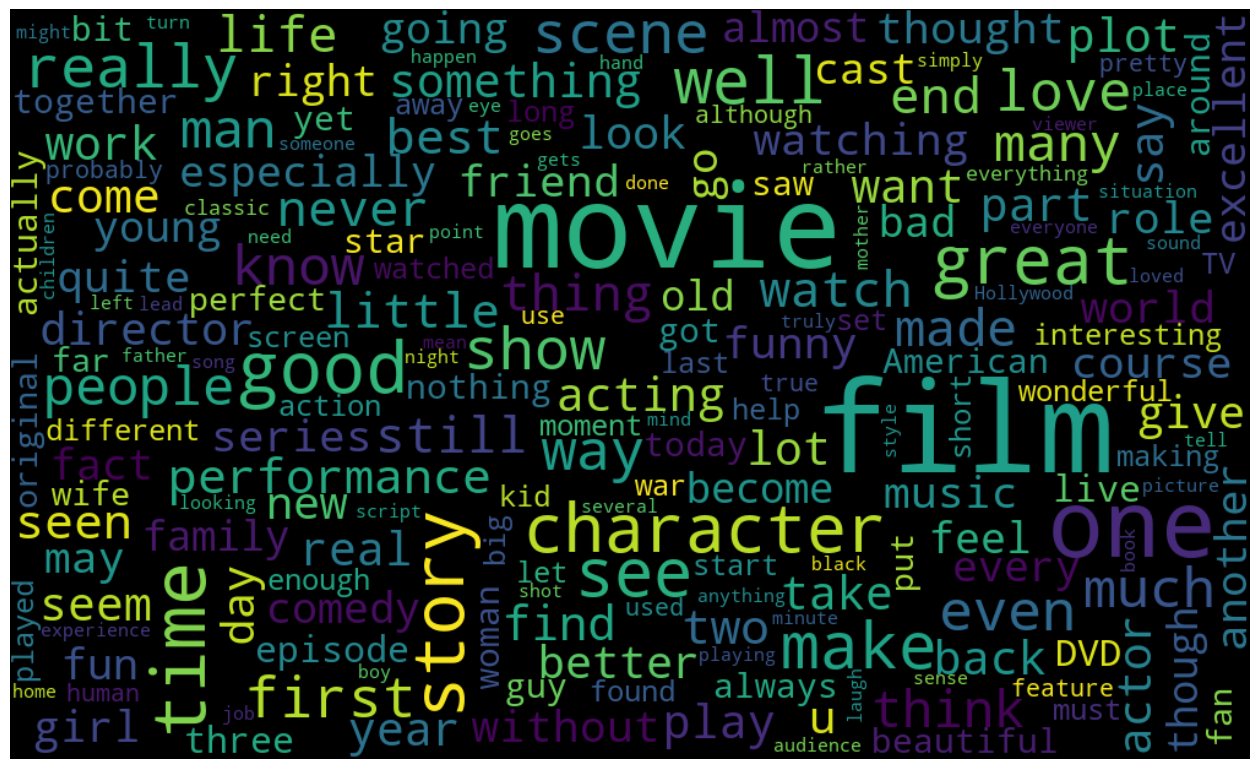

In [14]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 612, width = 1012, max_font_size =102)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

convert text data into numerical data using TfidfVectorizer

In [16]:
cv = TfidfVectorizer(max_features=2300)

In [17]:
reviews = cv.fit_transform(data['text']).toarray()

convert category data to numerical data (i.e neg = 0 and pos = 1)

In [19]:
data['sentiment'] = data['sentiment'].replace(['pos', 'neg'], [1,0])

C:\Users\adegb\AppData\Local\Temp\ipykernel_5568\500217945.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['pos', 'neg'], [1,0])


In [20]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

slipt dataset into training and testing data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
text_train, text_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.25)

create model and fit model with the data

In [28]:
model = LogisticRegression()

In [29]:
model.fit(text_train, sent_train)

LogisticRegression()

In [32]:
predict = model.predict(text_test)

test model

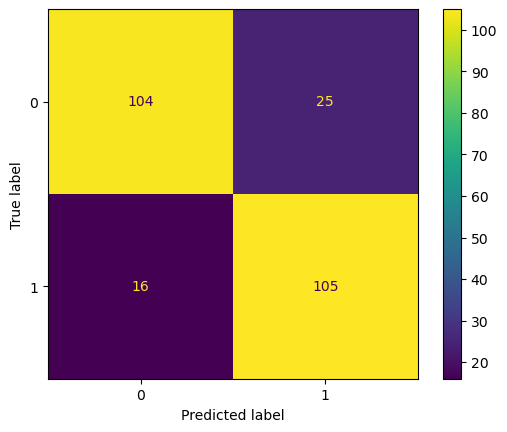

In [33]:
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=model.classes_)
display.plot()
plt.show()

save model and TfidfVectorizer object (cv)

In [38]:
pk.dump(model,open('model/MRSAmodel.pkl','wb'))

In [40]:
pk.dump(cv,open('model/scaler.pkl', 'wb'))